In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('/content/LoanExport.csv')

In [ ]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172426 entries, 0 to 172425
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         172426 non-null  int64  
 1   FirstPaymentDate    172426 non-null  int64  
 2   FirstTimeHomebuyer  172426 non-null  object 
 3   MaturityDate        172426 non-null  int64  
 4   MSA                 172426 non-null  object 
 5   MIP                 172426 non-null  int64  
 6   Units               172426 non-null  int64  
 7   Occupancy           172426 non-null  object 
 8   OCLTV               172426 non-null  int64  
 9   DTI                 172426 non-null  int64  
 10  OrigUPB             172426 non-null  int64  
 11  LTV                 172426 non-null  int64  
 12  OrigInterestRate    172426 non-null  float64
 13  Channel             172426 non-null  object 
 14  PPM                 172426 non-null  object 
 15  ProductType         172426 non-nul

In [ ]:
df.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,172426.000000,172426.000000,172426.000000,172426.000000,172426.000000,172426.000000,172426.000000,172426.000000,172426.000000,172426.000000,172426.000000,172426.000000,172426.000000,172426.000000
mean,673.305691,199904.602844,202902.426223,11.134301,1.024654,79.783919,31.617801,125330.988366,79.762008,6.957764,359.862991,0.263261,2.774541,60.566098
std,67.494900,12.110312,15.702727,13.128646,0.193952,13.453634,12.845593,52837.505252,13.444905,0.352985,2.040303,0.440404,10.894762,46.471151
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,9000.000000,0.000000,4.750000,301.000000,0.000000,0.000000,1.000000
25%,653.000000,199903.000000,202902.000000,0.000000,1.000000,75.000000,25.000000,84000.000000,75.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,684.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,33.000000,118000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,709.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,40.000000,160000.000000,90.000000,7.125000,360.000000,1.000000,1.000000,63.000000
max,731.000000,201303.000000,204302.000000,52.000000,4.000000,110.000000,65.000000,461000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


In [ ]:
df.isnull()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172421,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
172422,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
172423,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
172424,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
CreditScore,0
FirstPaymentDate,0
FirstTimeHomebuyer,0
MaturityDate,0
MSA,0
MIP,0
Units,0
Occupancy,0
OCLTV,0
DTI,0


In [ ]:
print(" Mode Value \n",[df['SellerName'].mode().values[0]])

 Mode Value 
 ['Ot']


In [ ]:
df['SellerName'] = df['SellerName'].fillna(df['SellerName'].dropna().mode().values[0])

In [ ]:
df['SellerName'].isnull().sum()

0

In [ ]:
df['FirstTimeHomebuyer'].value_counts()

,count
FirstTimeHomebuyer,
N,107584
X,45854
Y,18988


In [ ]:
df['FirstTimeHomebuyer'].sort_values()

,FirstTimeHomebuyer
0,N
101989,N
101988,N
101987,N
101986,N
...,...
89099,Y
89100,Y
89101,Y
89081,Y


In [ ]:
df =  df[df["FirstTimeHomebuyer"]!= 'X']

In [ ]:
df["FirstTimeHomebuyer"]

,FirstTimeHomebuyer
0,N
1,N
2,N
3,N
4,N
...,...
172421,Y
172422,Y
172423,Y
172424,Y


In [ ]:
df["FirstTimeHomebuyer"].value_counts()

,count
FirstTimeHomebuyer,
N,107584
Y,18988


In [ ]:
df.FirstTimeHomebuyer.shape

(126572,)

In [ ]:
df['PPM'].value_counts()

,count
PPM,
N,121529
X,2893
Y,2150


In [ ]:
df =df[df['PPM']!='X']

In [ ]:
df['PPM'].value_counts()

,count
PPM,
N,121529
Y,2150


In [ ]:
df.PropertyType.dtypes

dtype('O')

In [ ]:
df.PropertyType.info()

<class 'pandas.core.series.Series'>
Index: 123679 entries, 0 to 172425
Series name: PropertyType
Non-Null Count   Dtype 
--------------   ----- 
123679 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB


In [ ]:
df.PropertyType.value_counts()

,count
PropertyType,
SF,103683
PU,12897
CO,6733
MH,310
CP,28
LH,20
X,8


In [ ]:
df =df[df['PropertyType']!='X']
df=df[df["PropertyType"]!= "X"]
df['PropertyType'].value_counts()

,count
PropertyType,
SF,103683
PU,12897
CO,6733
MH,310
CP,28
LH,20
X,8


In [ ]:
df.MSA.shape

(123679,)

In [ ]:
df.MSA.value_counts()

,count
MSA,
X,16430
31084,4181
16974,3887
12060,3223
47644,2686
...,...
41900,3
21940,2
25020,1


In [ ]:
df['MSA'] = pd.to_numeric(df['MSA'], errors='coerce').fillna(0).astype(int)
df = df[df['MSA'] != 0]
df.MSA.shape

(107249,)

In [ ]:
df['MSA'].value_counts()

,count
MSA,
31084,4181
16974,3887
12060,3223
47644,2686
38060,2642
...,...
41900,3
21940,2
25020,1


In [ ]:
df['MSA'].sort_values(ascending=False)

,MSA
24094,49740
91402,49740
34353,49740
21762,49740
117708,49740
...,...
36721,10180
67974,10180
124990,10180
46093,10180


In [ ]:
df.isnull().sum()

,0
CreditScore,0
FirstPaymentDate,0
FirstTimeHomebuyer,0
MaturityDate,0
MSA,0
MIP,0
Units,0
Occupancy,0
OCLTV,0
DTI,0


In [ ]:
df.NumBorrowers.shape

(107249,)

In [ ]:
df.NumBorrowers.dtypes

dtype('O')

In [ ]:
df.NumBorrowers.value_counts()

,count
NumBorrowers,
2,69544
1,37635
X,70


In [ ]:
df['NumBorrowers'] = pd.to_numeric(df['NumBorrowers'], errors='coerce').fillna(0).astype(int)
df = df[df['NumBorrowers']!= 0]
df.NumBorrowers.value_counts()

,count
NumBorrowers,
2,69544
1,37635


In [ ]:
df["IsFirstTimeHomebuyer"] = df['FirstTimeHomebuyer'].map({"N":0,"Y":1})
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,IsFirstTimeHomebuyer
0,0,199902,N,202901,16974,25,1,O,89,27,...,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52,0
1,0,199902,N,202901,19740,0,1,O,73,17,...,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144,0
2,0,199902,N,202901,29940,0,1,O,75,16,...,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67,0
3,0,199902,N,202901,31084,0,1,O,76,14,...,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35,0
4,0,199902,N,202901,35644,0,1,O,78,18,...,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54,0


In [ ]:
df['IsFirstTimeHomebuyer'].unique()

array([0, 1])

In [ ]:
df['LTV_Range'] = ""
for index, value in df['LTV'].items():
    if value >= 0 and value < 25:
        df.at[index, 'LTV_Range'] = 'Low'
    elif value >= 25 and value < 50:
        df.at[index, 'LTV_Range'] = 'Medium'
    elif value >= 50 and value < 75:
        df.at[index, 'LTV_Range'] = 'High'
    elif value >= 75 and value <= 100:
        df.at[index, 'LTV_Range'] = ' Very High'
    else:
        df.at[index, 'LTV_Range'] = 'Invalid value'
df['LTV'].value_counts().index

Index([ 95,  80,  90,  75,  85,  97,  79,  78,  89,  74,  70,  77,  88,  73,
        72,  76,  87,  71,  69,  84,  68,  65,  86,  67,  93,  94,  66,  83,
        64,  60,  63,  92,  62,  56,  61,  57,  59,  82,  55,  53,  54,  58,
        50,  52,  48,  91,  51,  49,  47,  45,  44,  43,  46,  40,  42,  81,
        39,  37,  38,  41,  36,  34,  35,  32,  30,  96,  33,  28,  31,  27,
        25,  29,  26,  24,  22,  23,  20,  21,  17,  19,  18,  16,  15,  14,
        13,  12,  98, 100,  10,   8,   6,   7,  11,   0],
      dtype='int64', name='LTV')

In [ ]:
df['CreditRange'] = ""
for index, value in df['CreditScore'].items():
    if value >= 0 and value < 650:
        df.at[index, 'CreditRange'] = 'Poor'
    elif value >= 650 and value < 700:
        df.at[index, 'CreditRange'] = 'Fair'
    elif value >= 700 and value < 750:
        df.at[index, 'CreditRange'] = 'Good'
    elif value >= 750 and value <= 900:
        df.at[index, 'CreditRange'] = 'Excellent'
    else:
        df.at[index, 'CreditRange'] = 'Invalid value'

In [ ]:
df['MIP'].value_counts()

,count
MIP,
0,54247
30,24576
25,18337
12,5022
18,1644
17,1359
35,681
36,539
29,406


In [ ]:
df['RepPayRange'] = ""
for index, value in df['MonthsInRepayment'].items():
    if value >= 0 and value < 48:
        df.at[index, 'RepPayRange'] = '0-4yrs'
    elif value >= 48 and value < 96:
        df.at[index, 'RepPayRange'] = '4-8yrs'
    elif value >= 96 and value < 144:
        df.at[index, 'RepPayRange'] = '8-12yrs'
    elif value >= 144 and value < 192:
        df.at[index, 'RepPayRange'] = '12-16yrs'
    elif value >= 192 and value < 240:
        df.at[index, 'RepPayRange'] = '16-20yrs'
    else:
        df.at[index, 'RepPayRange'] = 'Invalid value'
df["RepPayRange"].value_counts()

,count
RepPayRange,
0-4yrs,53479
4-8yrs,39826
8-12yrs,5785
16-20yrs,4181
12-16yrs,3908


In [ ]:
df.head(100000)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,IsFirstTimeHomebuyer,LTV_Range,CreditRange,RepPayRange
0,0,199902,N,202901,16974,25,1,O,89,27,...,2,FL,WASHINGTONMUTUALBANK,0,0,52,0,Very High,Poor,4-8yrs
1,0,199902,N,202901,19740,0,1,O,73,17,...,1,FT,CHASEHOMEFINANCELLC,0,0,144,0,High,Poor,12-16yrs
2,0,199902,N,202901,29940,0,1,O,75,16,...,2,FL,WASHINGTONMUTUALBANK,0,0,67,0,Very High,Poor,4-8yrs
3,0,199902,N,202901,31084,0,1,O,76,14,...,2,GM,GMACMTGECORP,0,0,35,0,Very High,Poor,0-4yrs
4,0,199902,N,202901,35644,0,1,O,78,18,...,2,GM,GMACMTGECORP,0,0,54,0,Very High,Poor,4-8yrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161128,725,199904,Y,202903,16740,0,1,O,79,33,...,2,FI,WELLSFARGOBANKNA,0,0,73,1,Very High,Good,4-8yrs
161129,725,199904,Y,202903,16974,0,1,O,94,0,...,2,ST,ABNAMROMTGEGROUPINC,0,0,9,1,Very High,Good,0-4yrs
161130,725,199904,Y,202903,17140,30,1,O,95,36,...,1,Ot,WASHINGTONMUTUALBANK,0,0,68,1,Very High,Good,4-8yrs
161131,725,199904,Y,202903,18140,0,1,O,80,36,...,1,NO,WELLSFARGOBANKNA,0,0,142,1,Very High,Good,8-12yrs


In [ ]:
# Convert the date columns to datetime format
df['FirstPaymentDate'] = pd.to_datetime(df['FirstPaymentDate'],format='%Y%m')
df['MaturityDate'] = pd.to_datetime(df['MaturityDate'], format='%Y%m')
# Calculate the difference in months
df['Month_Difference'] = (df['MaturityDate'].dt.to_period('M') - df['FirstPaymentDate'].dt.to_period('M')).apply(lambda x: x.n)

In [ ]:
df["Month_Difference"].value_counts()

,count
Month_Difference,
359,106544
353,134
335,44
347,27
311,25
352,24
358,20
354,19
323,18


In [ ]:
df.head(1000)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,IsFirstTimeHomebuyer,LTV_Range,CreditRange,RepPayRange,Month_Difference
0,0,1999-02-01,N,2029-01-01,16974,25,1,O,89,27,...,FL,WASHINGTONMUTUALBANK,0,0,52,0,Very High,Poor,4-8yrs,359
1,0,1999-02-01,N,2029-01-01,19740,0,1,O,73,17,...,FT,CHASEHOMEFINANCELLC,0,0,144,0,High,Poor,12-16yrs,359
2,0,1999-02-01,N,2029-01-01,29940,0,1,O,75,16,...,FL,WASHINGTONMUTUALBANK,0,0,67,0,Very High,Poor,4-8yrs,359
3,0,1999-02-01,N,2029-01-01,31084,0,1,O,76,14,...,GM,GMACMTGECORP,0,0,35,0,Very High,Poor,0-4yrs,359
4,0,1999-02-01,N,2029-01-01,35644,0,1,O,78,18,...,GM,GMACMTGECORP,0,0,54,0,Very High,Poor,4-8yrs,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,534,1999-03-01,N,2029-02-01,43340,0,1,O,66,52,...,GM,GMACMTGECORP,1,2,75,0,High,Poor,4-8yrs,359
1602,534,1999-04-01,N,2029-03-01,16974,30,1,O,95,29,...,Ot,Other servicers,0,0,24,0,Very High,Poor,0-4yrs,359
1603,534,1999-04-01,N,2029-03-01,26620,0,1,O,75,22,...,Ot,Other servicers,0,0,20,0,Very High,Poor,0-4yrs,359
1604,534,1999-04-01,N,2029-03-01,28140,0,1,O,75,53,...,GM,GMACMTGECORP,0,0,40,0,Very High,Poor,0-4yrs,359


In [ ]:
def calculate_emi(OrigUPB, OrigInterestRate, OrigLoanTerm):
    r = (OrigInterestRate / 12) / 100  # Convert annual interest rate to monthly rate
    n = OrigLoanTerm  # Total number of monthly installments

    emi = (OrigUPB * r * (1 + r) ** n) / ((1 + r) ** n - 1)
    return round(emi, 2)  # Round the EMI to 2 decimal places
# Calculate EMI and create a new column for EMI
df['monthly_payment'] = calculate_emi(df['OrigUPB'], df['OrigInterestRate'], df['OrigLoanTerm'])

In [ ]:
df["total_payment"] = df['monthly_payment']*df["OrigLoanTerm"]
df['total_payment'] = df['total_payment'].round(2)
df["interest_amount"] = df["total_payment"]-df["OrigUPB"]
df['interest_amount'] = df['interest_amount'].round(2)
df["monthly_income"] = (df["monthly_payment"]//df["DTI"])* 100
df['monthly_income'] = df['monthly_income'].round(2)
df["monthly_rate"] = df["OrigInterestRate"]/1200
df['monthly_rate'] = df['monthly_rate'].round(4)
def principle(monthly_rate,OrigUPB,monthly_payment,MonthsInRepayment):
    for i in range(MonthsInRepayment):
        interest = monthly_rate*OrigUPB
        p=monthly_payment-interest
    return round (p,2)


df["monthly_priciple amount"] = np.vectorize(principle)(df["monthly_rate"],df["OrigUPB"],df["monthly_payment"],df["MonthsInRepayment"])

In [ ]:
def principle(monthly_rate,OrigUPB,monthly_payment,MonthsInRepayment):
    remaining_principal = OrigUPB
    for i in range(MonthsInRepayment):
        interest = monthly_rate*OrigUPB
        p=monthly_payment-interest
        remaining_principal =  remaining_principal- p
    return round (remaining_principal,2)


df["principal_amount_remaining"] = np.vectorize(principle)(df["monthly_rate"],df["OrigUPB"],df["monthly_payment"],df["MonthsInRepayment"])

In [ ]:
def principle(monthly_rate,OrigUPB,monthly_payment,MonthsInRepayment):
    remaining_principal = OrigUPB
    for i in range(MonthsInRepayment):
        interest = monthly_rate*OrigUPB
        p=monthly_payment-interest
        remaining_principal =  remaining_principal- p
        priciple_amount_paid = OrigUPB - remaining_principal
    return round (priciple_amount_paid,2)


df["priciple_amount_paid"] = np.vectorize(principle)(df["monthly_rate"],df["OrigUPB"],df["monthly_payment"],df["MonthsInRepayment"])

In [ ]:
df

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,RepPayRange,Month_Difference,monthly_payment,total_payment,interest_amount,monthly_income,monthly_rate,monthly_priciple amount,principal_amount_remaining,priciple_amount_paid
0,0,1999-02-01,N,2029-01-01,16974,25,1,O,89,27,...,4-8yrs,359,758.86,273189.6,156189.6,2800.0,0.0056,103.66,111609.68,5390.32
1,0,1999-02-01,N,2029-01-01,19740,0,1,O,73,17,...,12-16yrs,359,688.95,248022.0,139022.0,4000.0,0.0054,100.35,94549.60,14450.40
2,0,1999-02-01,N,2029-01-01,29940,0,1,O,75,16,...,4-8yrs,359,578.10,208116.0,120116.0,3600.0,0.0057,76.50,82874.50,5125.50
3,0,1999-02-01,N,2029-01-01,31084,0,1,O,76,14,...,0-4yrs,359,1051.09,378392.4,218392.4,7500.0,0.0057,139.09,155131.85,4868.15
4,0,1999-02-01,N,2029-01-01,35644,0,1,O,78,18,...,4-8yrs,359,734.35,264366.0,155366.0,4000.0,0.0059,91.25,104072.50,4927.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172410,731,1999-03-01,Y,2029-02-01,41740,36,1,O,95,45,...,16-20yrs,359,1356.48,488332.8,294332.8,3000.0,0.0062,153.68,163571.36,30428.64
172411,731,1999-03-01,Y,2029-02-01,43900,30,1,O,95,36,...,8-12yrs,359,590.22,212479.2,121479.2,1600.0,0.0056,80.62,80519.40,10480.60
172412,731,1999-03-01,Y,2029-02-01,47644,30,1,O,95,31,...,0-4yrs,359,970.15,349254.0,205254.0,3100.0,0.0059,120.55,140383.50,3616.50
172413,731,1999-03-01,Y,2029-02-01,49660,30,1,O,92,24,...,0-4yrs,359,617.51,222303.6,128303.6,2500.0,0.0057,81.71,90159.63,3840.37


In [ ]:
def prepay(dti,income):
    if(dti<40):
        p=income/2
    else:
        p=income*3/4
    return p
df["prepayment"]=np.vectorize(prepay)(df["DTI"],df["monthly_income"]*24)
df["prepayment"]=df["prepayment"]-(df["monthly_payment"]*24)
df.isnull().sum()

,0
CreditScore,0
FirstPaymentDate,0
FirstTimeHomebuyer,0
MaturityDate,0
MSA,0
MIP,0
Units,0
Occupancy,0
OCLTV,0
DTI,0


In [ ]:
df

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,Month_Difference,monthly_payment,total_payment,interest_amount,monthly_income,monthly_rate,monthly_priciple amount,principal_amount_remaining,priciple_amount_paid,prepayment
0,0,1999-02-01,N,2029-01-01,16974,25,1,O,89,27,...,359,758.86,273189.6,156189.6,2800.0,0.0056,103.66,111609.68,5390.32,15387.36
1,0,1999-02-01,N,2029-01-01,19740,0,1,O,73,17,...,359,688.95,248022.0,139022.0,4000.0,0.0054,100.35,94549.60,14450.40,31465.20
2,0,1999-02-01,N,2029-01-01,29940,0,1,O,75,16,...,359,578.10,208116.0,120116.0,3600.0,0.0057,76.50,82874.50,5125.50,29325.60
3,0,1999-02-01,N,2029-01-01,31084,0,1,O,76,14,...,359,1051.09,378392.4,218392.4,7500.0,0.0057,139.09,155131.85,4868.15,64773.84
4,0,1999-02-01,N,2029-01-01,35644,0,1,O,78,18,...,359,734.35,264366.0,155366.0,4000.0,0.0059,91.25,104072.50,4927.50,30375.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172410,731,1999-03-01,Y,2029-02-01,41740,36,1,O,95,45,...,359,1356.48,488332.8,294332.8,3000.0,0.0062,153.68,163571.36,30428.64,21444.48
172411,731,1999-03-01,Y,2029-02-01,43900,30,1,O,95,36,...,359,590.22,212479.2,121479.2,1600.0,0.0056,80.62,80519.40,10480.60,5034.72
172412,731,1999-03-01,Y,2029-02-01,47644,30,1,O,95,31,...,359,970.15,349254.0,205254.0,3100.0,0.0059,120.55,140383.50,3616.50,13916.40
172413,731,1999-03-01,Y,2029-02-01,49660,30,1,O,92,24,...,359,617.51,222303.6,128303.6,2500.0,0.0057,81.71,90159.63,3840.37,15179.76


In [ ]:
df.drop(['FirstTimeHomebuyer','LTV','MonthsInRepayment',"CreditScore","FirstPaymentDate","MaturityDate"],axis=1, inplace=True)
df.drop(['PostalCode','LoanSeqNum',"ProductType"],axis=1, inplace=True)
df

,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,...,Month_Difference,monthly_payment,total_payment,interest_amount,monthly_income,monthly_rate,monthly_priciple amount,principal_amount_remaining,priciple_amount_paid,prepayment
0,16974,25,1,O,89,27,117000,6.750,T,N,...,359,758.86,273189.6,156189.6,2800.0,0.0056,103.66,111609.68,5390.32,15387.36
1,19740,0,1,O,73,17,109000,6.500,R,N,...,359,688.95,248022.0,139022.0,4000.0,0.0054,100.35,94549.60,14450.40,31465.20
2,29940,0,1,O,75,16,88000,6.875,T,N,...,359,578.10,208116.0,120116.0,3600.0,0.0057,76.50,82874.50,5125.50,29325.60
3,31084,0,1,O,76,14,160000,6.875,R,N,...,359,1051.09,378392.4,218392.4,7500.0,0.0057,139.09,155131.85,4868.15,64773.84
4,35644,0,1,O,78,18,109000,7.125,R,N,...,359,734.35,264366.0,155366.0,4000.0,0.0059,91.25,104072.50,4927.50,30375.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172410,41740,36,1,O,95,45,194000,7.500,T,N,...,359,1356.48,488332.8,294332.8,3000.0,0.0062,153.68,163571.36,30428.64,21444.48
172411,43900,30,1,O,95,36,91000,6.750,R,N,...,359,590.22,212479.2,121479.2,1600.0,0.0056,80.62,80519.40,10480.60,5034.72
172412,47644,30,1,O,95,31,144000,7.125,R,N,...,359,970.15,349254.0,205254.0,3100.0,0.0059,120.55,140383.50,3616.50,13916.40
172413,49660,30,1,O,92,24,94000,6.875,R,N,...,359,617.51,222303.6,128303.6,2500.0,0.0057,81.71,90159.63,3840.37,15179.76


In [ ]:
df.head()

,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,...,Month_Difference,monthly_payment,total_payment,interest_amount,monthly_income,monthly_rate,monthly_priciple amount,principal_amount_remaining,priciple_amount_paid,prepayment
0,16974,25,1,O,89,27,117000,6.750,T,N,...,359,758.86,273189.6,156189.6,2800.0,0.0056,103.66,111609.68,5390.32,15387.36
1,19740,0,1,O,73,17,109000,6.500,R,N,...,359,688.95,248022.0,139022.0,4000.0,0.0054,100.35,94549.60,14450.40,31465.20
2,29940,0,1,O,75,16,88000,6.875,T,N,...,359,578.10,208116.0,120116.0,3600.0,0.0057,76.50,82874.50,5125.50,29325.60
3,31084,0,1,O,76,14,160000,6.875,R,N,...,359,1051.09,378392.4,218392.4,7500.0,0.0057,139.09,155131.85,4868.15,64773.84
4,35644,0,1,O,78,18,109000,7.125,R,N,...,359,734.35,264366.0,155366.0,4000.0,0.0059,91.25,104072.50,4927.50,30375.60


In [ ]:
# Label Encoding
df.columns

Index(['MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB',
       'OrigInterestRate', 'Channel', 'PPM', 'PropertyState', 'PropertyType',
       'LoanPurpose', 'OrigLoanTerm', 'NumBorrowers', 'SellerName',
       'ServicerName', 'EverDelinquent', 'MonthsDelinquent',
       'IsFirstTimeHomebuyer', 'LTV_Range', 'CreditRange', 'RepPayRange',
       'Month_Difference', 'monthly_payment', 'total_payment',
       'interest_amount', 'monthly_income', 'monthly_rate',
       'monthly_priciple amount', 'principal_amount_remaining',
       'priciple_amount_paid', 'prepayment'],
      dtype='object')

In [ ]:
encoder=LabelEncoder()
df['PPM']= encoder.fit_transform(df['PPM'])
df['LoanPurpose']= encoder.fit_transform(df['LoanPurpose'])
df['PropertyState']= encoder.fit_transform(df['PropertyState'])
df['ServicerName']= encoder.fit_transform(df['ServicerName'])
df['PropertyType']= encoder.fit_transform(df['PropertyType'])
df['Channel']= encoder.fit_transform(df['Channel'])
df['SellerName']= encoder.fit_transform(df['SellerName'])
df['LTV_Range']= encoder.fit_transform(df['LTV_Range'])
df['DTI']= encoder.fit_transform(df['DTI'])
df['CreditRange']= encoder.fit_transform(df['CreditRange'])
df['MIP']= encoder.fit_transform(df['MIP'])
df['RepPayRange']= encoder.fit_transform(df['RepPayRange'])
df['Month_Difference']= encoder.fit_transform(df['Month_Difference'])

In [ ]:
df.shape

(107179, 33)

In [ ]:
df.head()

,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,...,Month_Difference,monthly_payment,total_payment,interest_amount,monthly_income,monthly_rate,monthly_priciple amount,principal_amount_remaining,priciple_amount_paid,prepayment
0,16974,17,1,O,89,27,117000,6.750,3,0,...,58,758.86,273189.6,156189.6,2800.0,0.0056,103.66,111609.68,5390.32,15387.36
1,19740,0,1,O,73,17,109000,6.500,2,0,...,58,688.95,248022.0,139022.0,4000.0,0.0054,100.35,94549.60,14450.40,31465.20
2,29940,0,1,O,75,16,88000,6.875,3,0,...,58,578.10,208116.0,120116.0,3600.0,0.0057,76.50,82874.50,5125.50,29325.60
3,31084,0,1,O,76,14,160000,6.875,2,0,...,58,1051.09,378392.4,218392.4,7500.0,0.0057,139.09,155131.85,4868.15,64773.84
4,35644,0,1,O,78,18,109000,7.125,2,0,...,58,734.35,264366.0,155366.0,4000.0,0.0059,91.25,104072.50,4927.50,30375.60


In [ ]:
# One hot encoding
df.columns

Index(['MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB',
       'OrigInterestRate', 'Channel', 'PPM', 'PropertyState', 'PropertyType',
       'LoanPurpose', 'OrigLoanTerm', 'NumBorrowers', 'SellerName',
       'ServicerName', 'EverDelinquent', 'MonthsDelinquent',
       'IsFirstTimeHomebuyer', 'LTV_Range', 'CreditRange', 'RepPayRange',
       'Month_Difference', 'monthly_payment', 'total_payment',
       'interest_amount', 'monthly_income', 'monthly_rate',
       'monthly_priciple amount', 'principal_amount_remaining',
       'priciple_amount_paid', 'prepayment'],
      dtype='object')

In [ ]:
df_city = pd.get_dummies(df['Occupancy'],drop_first = True)
df=pd.concat([df,df_city],axis=1)
# Display the encoded DataFrame
df.head()

,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,...,total_payment,interest_amount,monthly_income,monthly_rate,monthly_priciple amount,principal_amount_remaining,priciple_amount_paid,prepayment,O,S
0,16974,17,1,O,89,27,117000,6.750,3,0,...,273189.6,156189.6,2800.0,0.0056,103.66,111609.68,5390.32,15387.36,True,False
1,19740,0,1,O,73,17,109000,6.500,2,0,...,248022.0,139022.0,4000.0,0.0054,100.35,94549.60,14450.40,31465.20,True,False
2,29940,0,1,O,75,16,88000,6.875,3,0,...,208116.0,120116.0,3600.0,0.0057,76.50,82874.50,5125.50,29325.60,True,False
3,31084,0,1,O,76,14,160000,6.875,2,0,...,378392.4,218392.4,7500.0,0.0057,139.09,155131.85,4868.15,64773.84,True,False
4,35644,0,1,O,78,18,109000,7.125,2,0,...,264366.0,155366.0,4000.0,0.0059,91.25,104072.50,4927.50,30375.60,True,False


In [ ]:
df.drop('Occupancy',axis=1,inplace=True)
df.head()

,MSA,MIP,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,PropertyState,...,total_payment,interest_amount,monthly_income,monthly_rate,monthly_priciple amount,principal_amount_remaining,priciple_amount_paid,prepayment,O,S
0,16974,17,1,89,27,117000,6.750,3,0,14,...,273189.6,156189.6,2800.0,0.0056,103.66,111609.68,5390.32,15387.36,True,False
1,19740,0,1,73,17,109000,6.500,2,0,5,...,248022.0,139022.0,4000.0,0.0054,100.35,94549.60,14450.40,31465.20,True,False
2,29940,0,1,75,16,88000,6.875,3,0,16,...,208116.0,120116.0,3600.0,0.0057,76.50,82874.50,5125.50,29325.60,True,False
3,31084,0,1,76,14,160000,6.875,2,0,4,...,378392.4,218392.4,7500.0,0.0057,139.09,155131.85,4868.15,64773.84,True,False
4,35644,0,1,78,18,109000,7.125,2,0,31,...,264366.0,155366.0,4000.0,0.0059,91.25,104072.50,4927.50,30375.60,True,False


In [ ]:
df = df[~df.isin([np.inf, -np.inf]).any(axis=1)]
df.shape

(106042, 34)

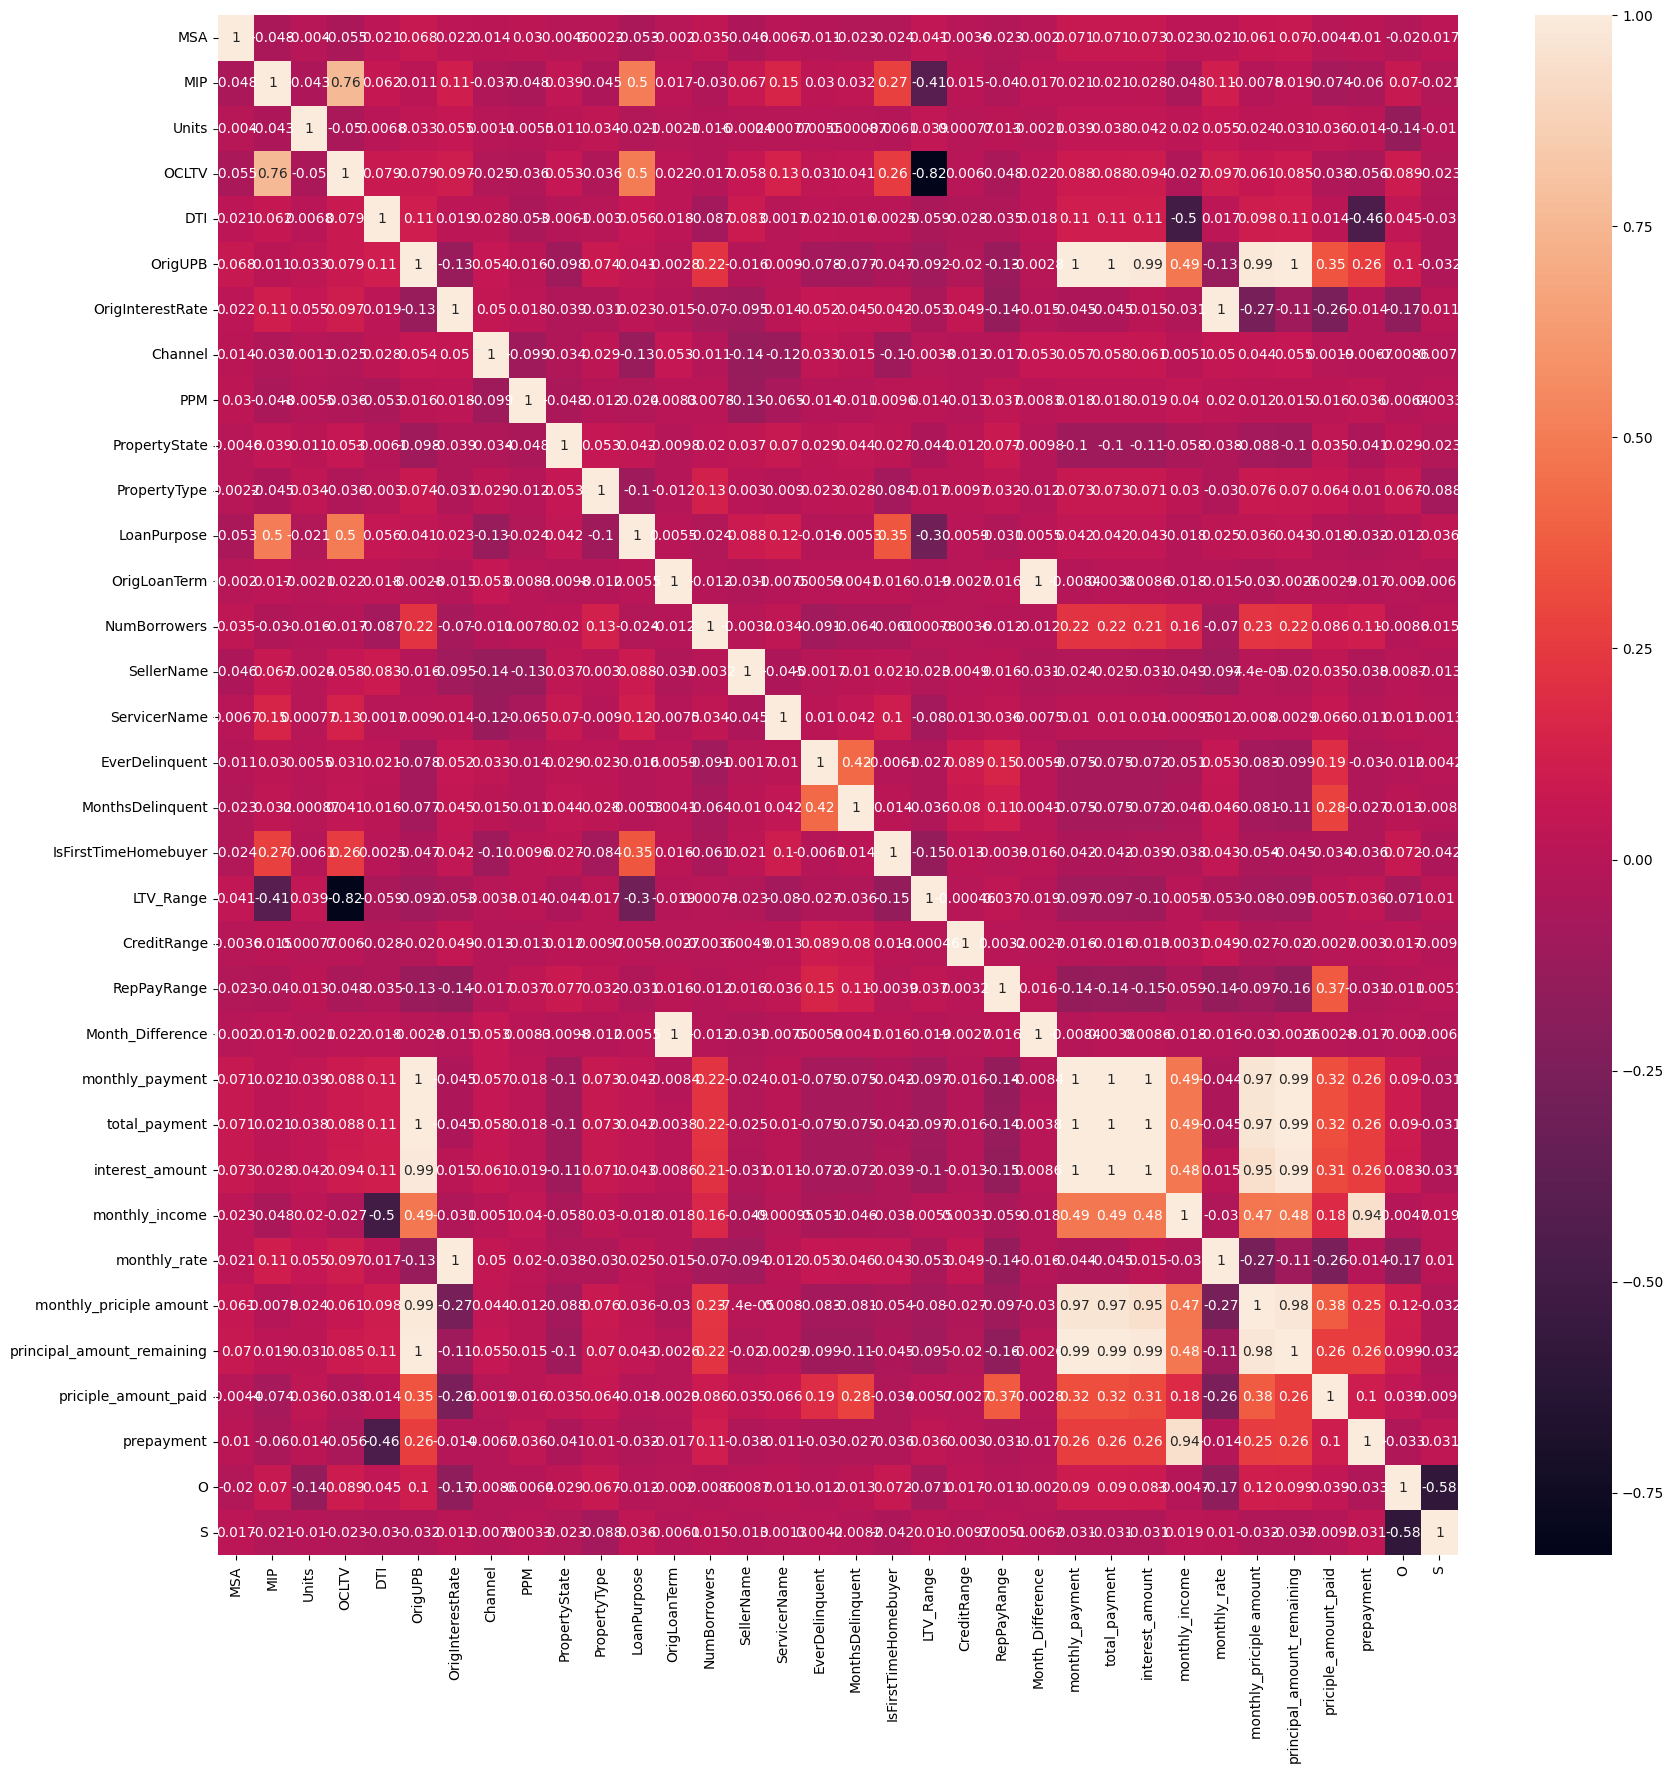

In [ ]:
#Feature Selection
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

In [ ]:
df.drop(['OrigLoanTerm'],axis=1, inplace=True)
df.drop(['OrigUPB'],axis=1, inplace=True)
df.drop(['OrigInterestRate'],axis=1, inplace=True)
x=df.drop("prepayment",axis=1)
y=df["prepayment"]
x

,MSA,MIP,Units,OCLTV,DTI,Channel,PPM,PropertyState,PropertyType,LoanPurpose,...,monthly_payment,total_payment,interest_amount,monthly_income,monthly_rate,monthly_priciple amount,principal_amount_remaining,priciple_amount_paid,O,S
0,16974,17,1,89,27,3,0,14,5,2,...,758.86,273189.6,156189.6,2800.0,0.0056,103.66,111609.68,5390.32,True,False
1,19740,0,1,73,17,2,0,5,5,1,...,688.95,248022.0,139022.0,4000.0,0.0054,100.35,94549.60,14450.40,True,False
2,29940,0,1,75,16,3,0,16,5,1,...,578.10,208116.0,120116.0,3600.0,0.0057,76.50,82874.50,5125.50,True,False
3,31084,0,1,76,14,2,0,4,5,1,...,1051.09,378392.4,218392.4,7500.0,0.0057,139.09,155131.85,4868.15,True,False
4,35644,0,1,78,18,2,0,31,5,1,...,734.35,264366.0,155366.0,4000.0,0.0059,91.25,104072.50,4927.50,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172410,41740,26,1,95,45,3,0,4,5,2,...,1356.48,488332.8,294332.8,3000.0,0.0062,153.68,163571.36,30428.64,True,False
172411,43900,22,1,95,36,2,0,41,5,2,...,590.22,212479.2,121479.2,1600.0,0.0056,80.62,80519.40,10480.60,True,False
172412,47644,22,1,95,31,2,0,22,0,2,...,970.15,349254.0,205254.0,3100.0,0.0059,120.55,140383.50,3616.50,True,False
172413,49660,22,1,92,24,2,0,35,5,2,...,617.51,222303.6,128303.6,2500.0,0.0057,81.71,90159.63,3840.37,True,False


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming you have your features (X) and target variable (y) ready
# Replace 'X' and 'y' with the actual names of your feature matrix and target array

# Create a Linear Regression model
model = LinearRegression()

# Create RFE with the Linear Regression model and specify the desired number of features
rfe = RFE(model, n_features_to_select=20)  # Change the 'n_features_to_select' as per your requirement

# Fit RFE on the data
rfe.fit(x, y)

# Get the selected features
selected_features = x.columns[rfe.support_]

# Print the selected features
print("Selected Features:", selected_features)

Selected Features: Index(['Units', 'OCLTV', 'DTI', 'Channel', 'PPM', 'PropertyState',
       'PropertyType', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'IsFirstTimeHomebuyer', 'CreditRange', 'RepPayRange',
       'Month_Difference', 'monthly_payment', 'monthly_income', 'monthly_rate',
       'O', 'S'],
      dtype='object')


In [ ]:
# List of selected columns
selected_columns = ['Units', 'OCLTV', 'DTI', 'Channel', 'PPM', 'PropertyType',
       'NumBorrowers', 'ServicerName', 'EverDelinquent',
       'IsFirstTimeHomebuyer', 'CreditRange', 'monthly_payment',
       'total_payment', 'interest_amount', 'monthly_income', 'monthly_rate',
       'principal_amount_remaining', 'priciple_amount_paid', 'O', 'S']

# Create a new DataFrame with only the selected columns
new_dataset = x[selected_columns].copy()

# Display the new DataFrame
print(new_dataset)

        Units  OCLTV  DTI  Channel  PPM  PropertyType  NumBorrowers  \
0           1     89   27        3    0             5             2   
1           1     73   17        2    0             5             1   
2           1     75   16        3    0             5             2   
3           1     76   14        2    0             5             2   
4           1     78   18        2    0             5             2   
...       ...    ...  ...      ...  ...           ...           ...   
172410      1     95   45        3    0             5             2   
172411      1     95   36        2    0             5             2   
172412      1     95   31        2    0             0             2   
172413      1     92   24        2    0             5             2   
172425      1     48   16        2    0             5             2   

        ServicerName  EverDelinquent  IsFirstTimeHomebuyer  CreditRange  \
0                 17               0                     0            2 

In [ ]:
scaler = StandardScaler()
scaler_fitX = scaler.fit_transform(x)
y_rescaled = scaler.fit_transform(y.values.reshape(-1, 1))
X=pd.DataFrame(scaler_fitX, columns = x.columns)
Y = pd.DataFrame(y_rescaled, columns=['Rescaled_Target'])
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 42)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [ ]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

train_r2 = r2_score(Y_train, Y_train_pred)
test_r2 = r2_score(Y_test, Y_test_pred)

train_mse = mean_squared_error(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)

print("Training R-squared:", train_r2)
print("Testing R-squared:", test_r2)
print("Training Mean Squared Error:", train_mse)
print("Testing Mean Squared Error:", test_mse)

Training R-squared: 0.9593522355154193
Testing R-squared: 0.9683728195216069
Training Mean Squared Error: 0.03799628355228389
Testing Mean Squared Error: 0.03781566842914462


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Assuming df is your DataFrame and 'prepayment' is the target variable
x = df.drop("prepayment", axis=1)
y = df["prepayment"]

# Ensure all features in x are numeric
x_numeric = x.select_dtypes(include=[np.number])

# Now calculate VIF
vif = pd.DataFrame()
vif['Features'] = x_numeric.columns
vif['VIF'] = [variance_inflation_factor(x_numeric.values, i) for i in range(x_numeric.shape[1])]

print(vif)


                      Features           VIF
0                          MSA  8.536464e+00
1                          MIP  7.121043e+00
2                        Units  4.131739e+01
3                        OCLTV  3.857922e+02
4                          DTI  1.857927e+01
5                      Channel  3.033551e+01
6                          PPM  1.069833e+00
7                PropertyState  3.108697e+00
8                 PropertyType  1.730025e+01
9                  LoanPurpose  7.050838e+00
10                NumBorrowers  1.416267e+01
11                  SellerName  5.262175e+00
12                ServicerName  3.965559e+00
13              EverDelinquent  1.694214e+00
14            MonthsDelinquent  1.425543e+00
15        IsFirstTimeHomebuyer  1.393448e+00
16                   LTV_Range  5.862073e+00
17                 CreditRange  2.065555e+00
18                 RepPayRange  2.451618e+00
19            Month_Difference  2.130129e+03
20             monthly_payment  1.419446e+05
21        

In [ ]:
x1=new_dataset.drop(["total_payment","interest_amount","principal_amount_remaining","priciple_amount_paid"],axis=1)